In [33]:
import numpy as np
%matplotlib notebook
# %matplotlib inline
import json
import pickle
from datetime import datetime, timedelta
import pandas as pd

from src.main.imu_data_io import load_raw_sensor_data
from src.main.imu_preprocessing import (sync, resample)

from src.utils.imu_data_visualization import plot_raw_sensor

# This is a time_sync helper notebook for annotating timestamps

## IMU Annotation

1. Open `time_sync.json`
2. **Note** "imu_start_time"
2. Identify event (clap) from resampled data
3. **Note** "imu_clap_time"

In [28]:
subject_id = "9" # todo πειραξε το time_sync na leei 17_meal_1 episis

In [29]:
path = f"../data/raw/{subject_id}"

In [30]:
acc_data, gyro_data = load_raw_sensor_data(path)

In [31]:
sync_acc, sync_gyro = sync(acc_data, gyro_data)
res_acc, res_gyro = resample(acc_data, gyro_data)

In [34]:
print(res_acc['time'][0])

2023-09-30 12:14:40.376000


In [35]:
print(res_gyro['time'][0])

2023-09-30 12:14:40.376000


In [38]:
len(res_acc)

45115

<IPython.core.display.Javascript object>


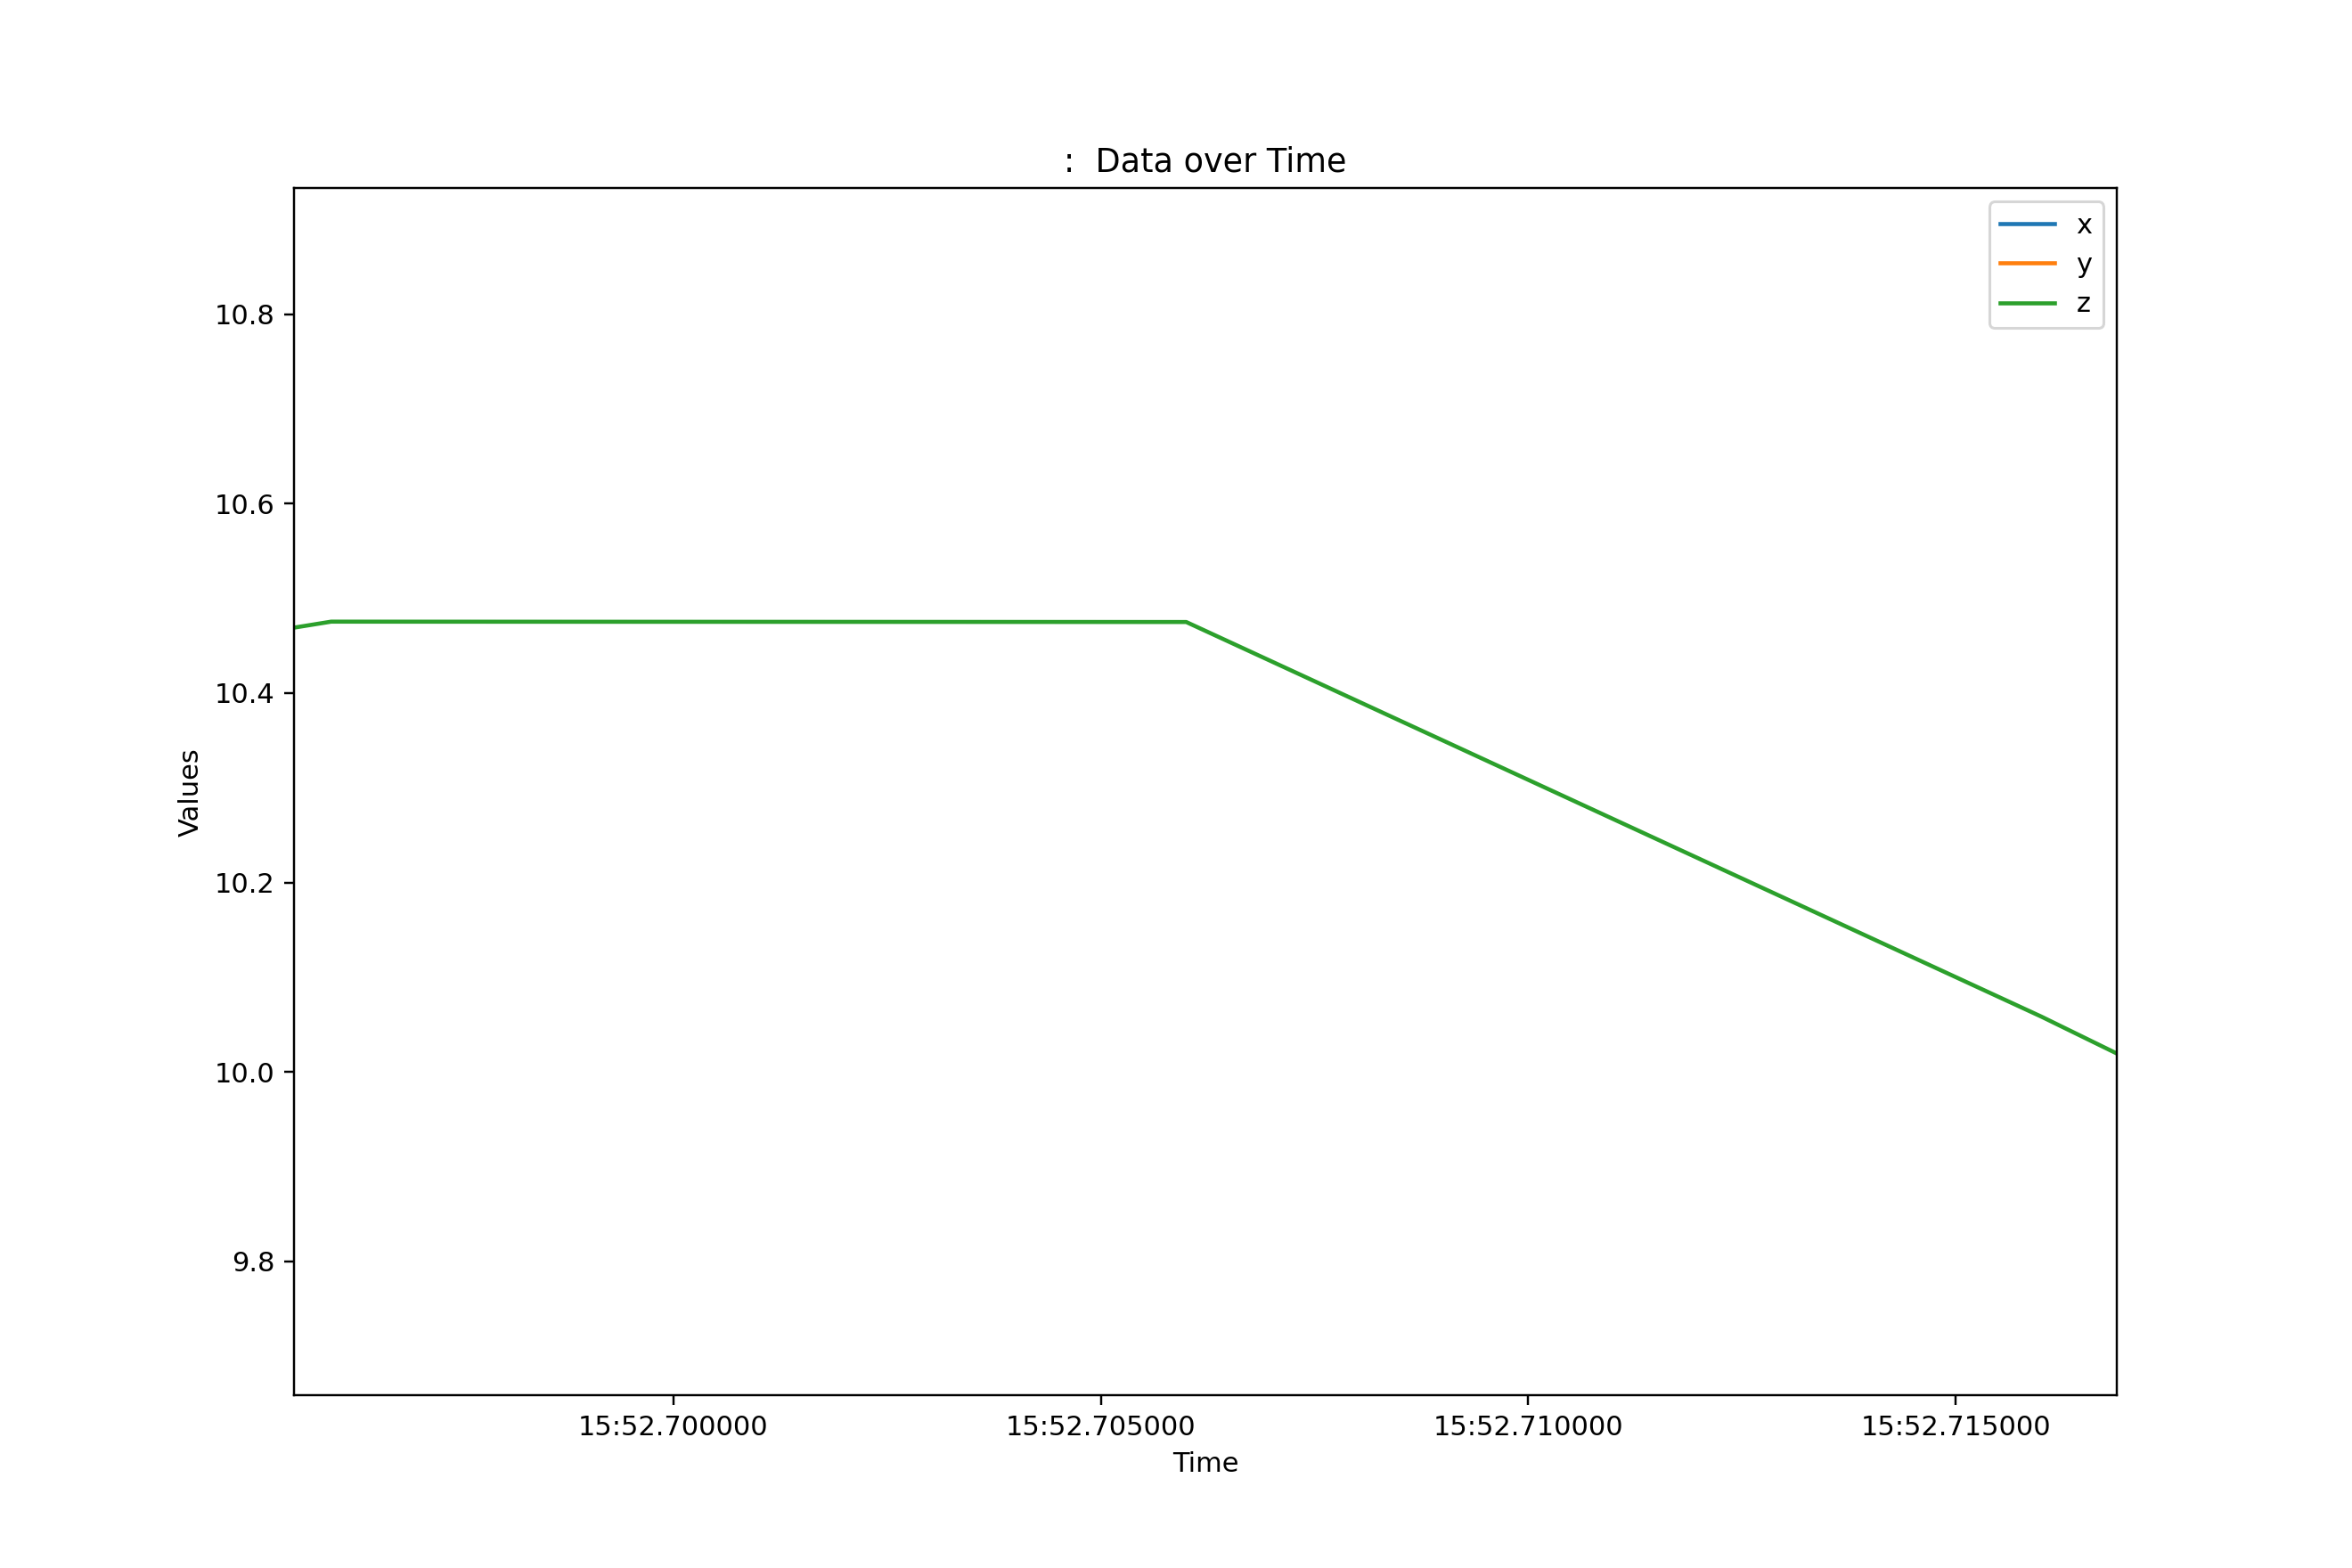

In [41]:
plot_raw_sensor(res_acc, "")

In [43]:
np.array(res_acc['time'])

array(['2023-09-30T12:14:40.376000000', '2023-09-30T12:14:40.386000000',
       '2023-09-30T12:14:40.396000000', ...,
       '2023-09-30T12:22:11.496000000', '2023-09-30T12:22:11.506000000',
       '2023-09-30T12:22:11.516000000'], dtype='datetime64[ns]')

<IPython.core.display.Javascript object>


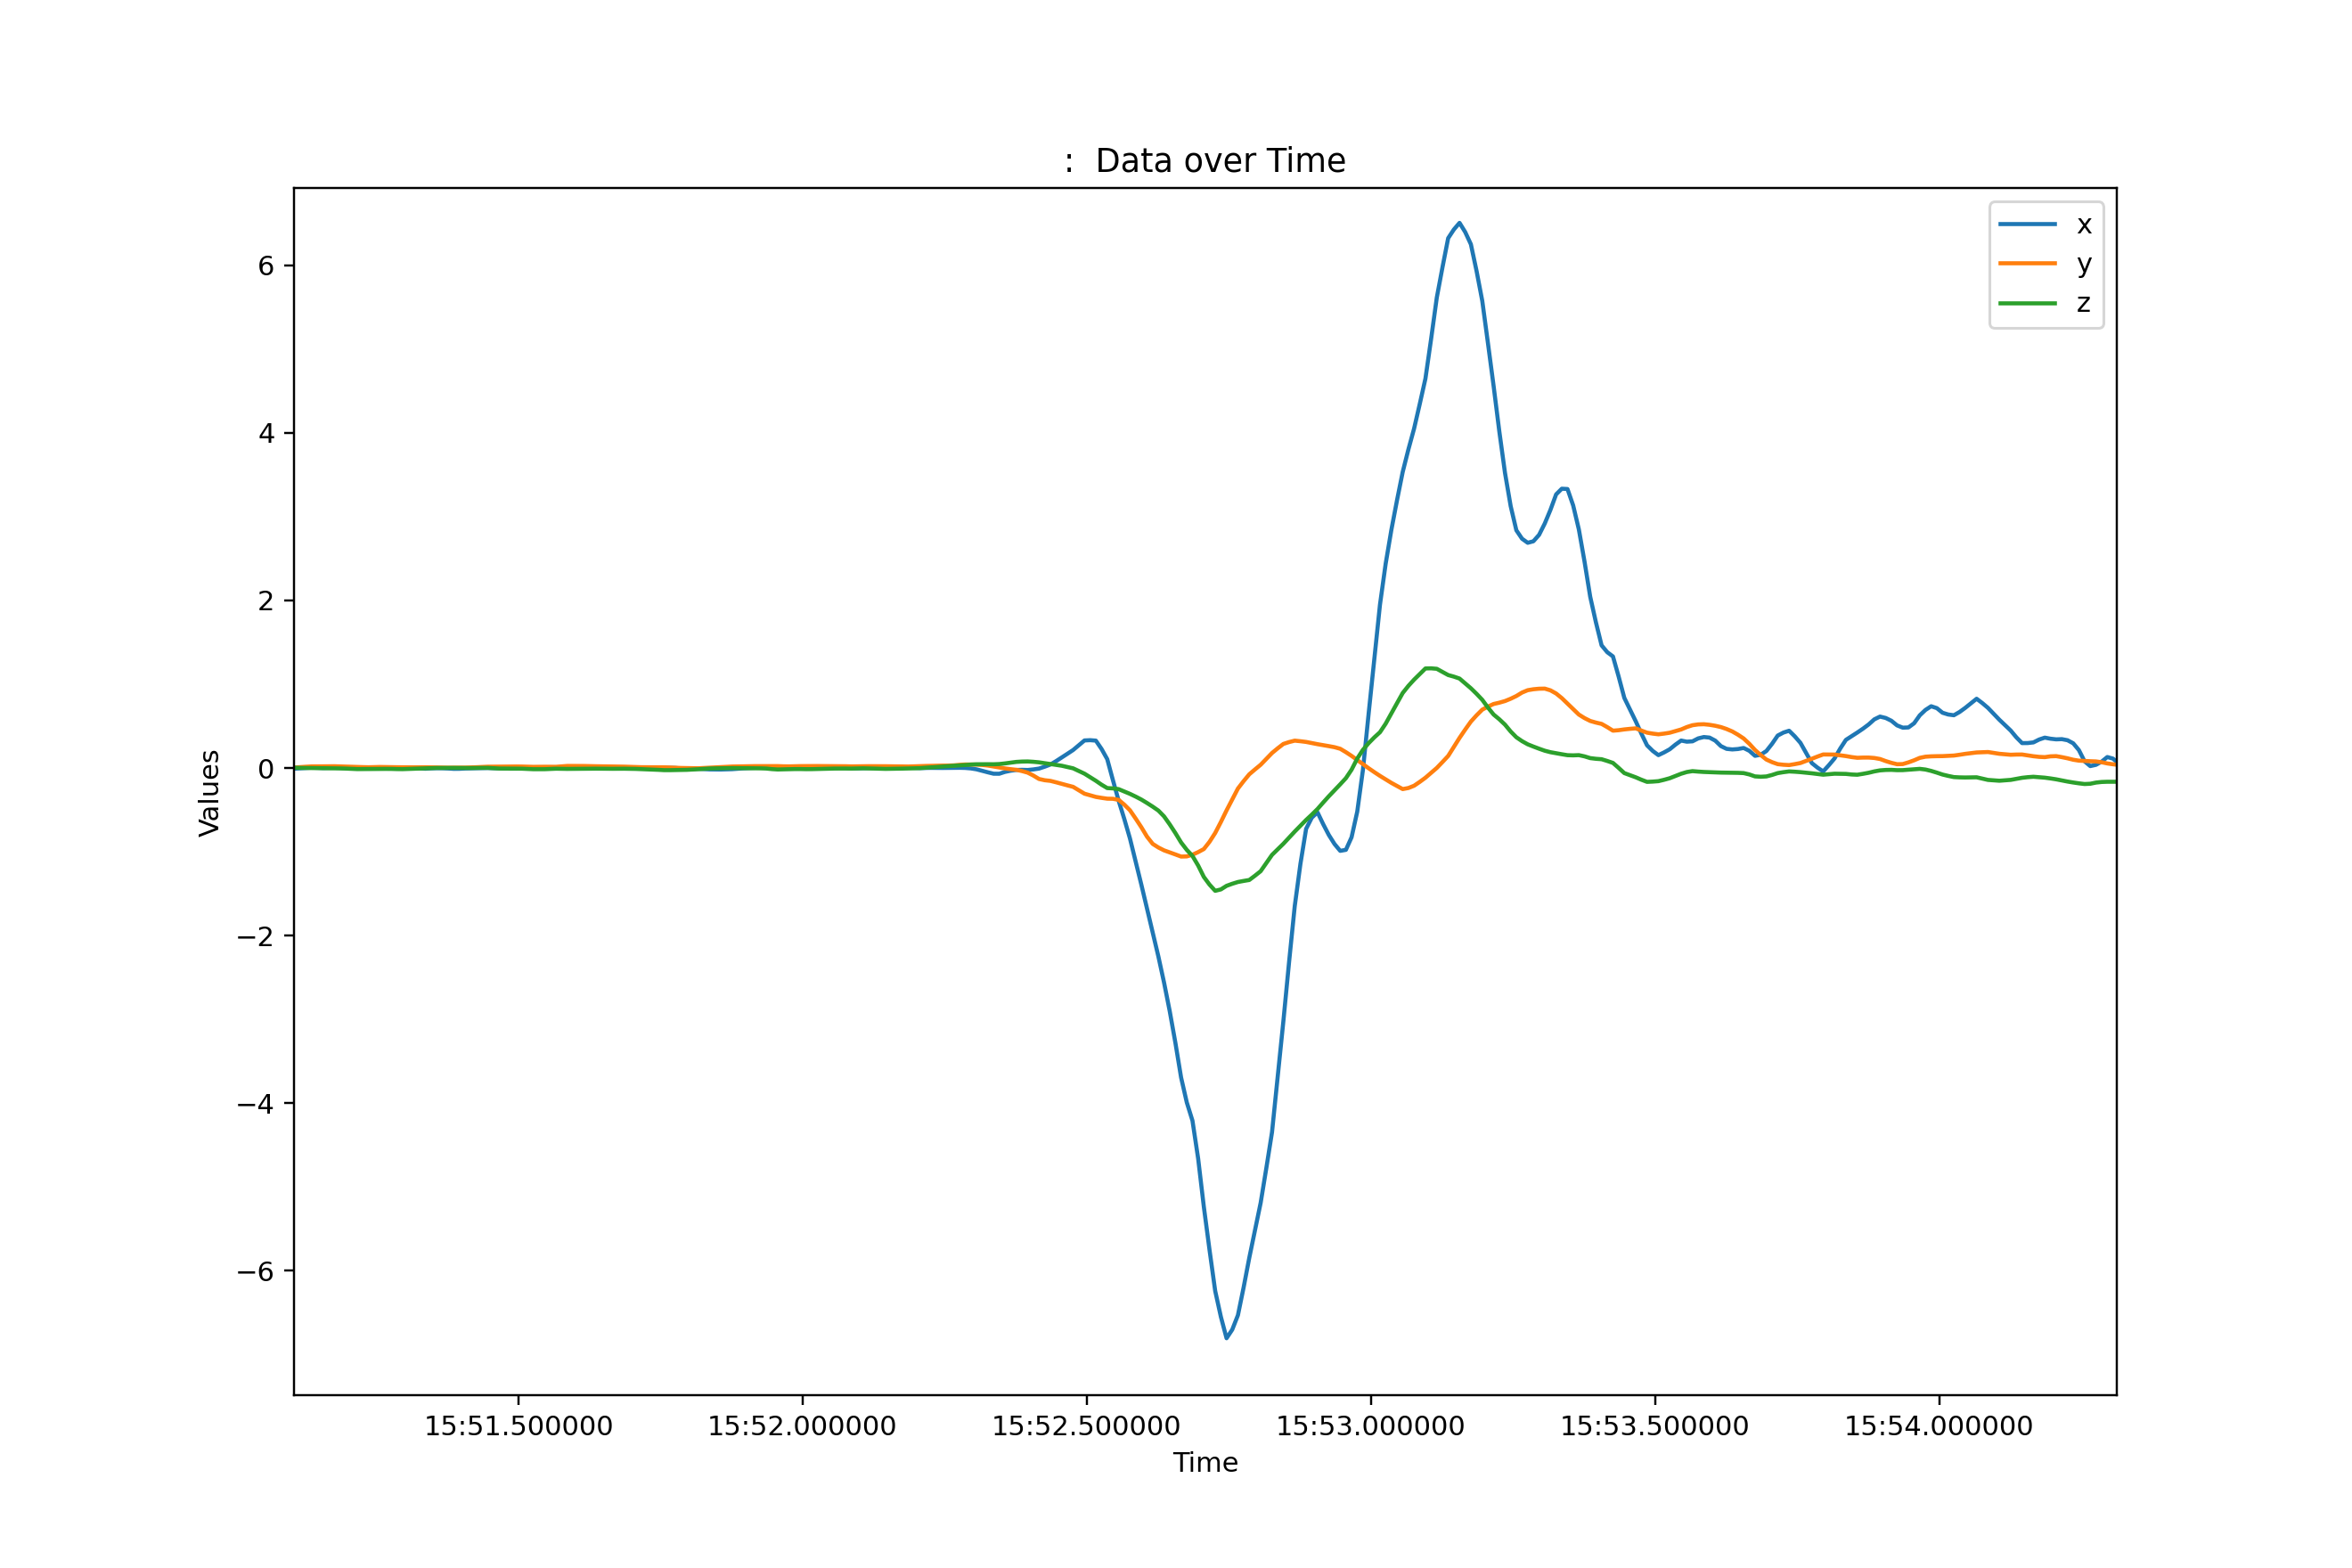

In [59]:
plot_raw_sensor(res_gyro, "")

## Video Annotation

1. **Open** ELAN and identify common event time
2. **Note** "relative_video_clap_time" in [time_sync.json](time_sync.json)

In [60]:
with open("time_sync.json", "r") as f:
    time_sync = json.load(f)
sync_subject = [info for info in time_sync['sync_info'] if info['subject_id'] == subject_id][0]

In [61]:
relative_video_clap_time = datetime.strptime(sync_subject['relative_video_clap_time'], '%H:%M:%S.%f') - datetime.strptime("00:00:00.0000", '%H:%M:%S.%f')
imu_clap_time = datetime.strptime(sync_subject['imu_clap_time'], '%H:%M:%S.%f')

3. **Calculate** video start time (fake time)

In [62]:
video_start_time = imu_clap_time - relative_video_clap_time

4. **Note** to json "video_start_time"  

In [63]:
print(video_start_time.strftime('%H:%M:%S.%f')[:-2])

12:15:38.2570


5. **Calculate** video_clap_time

In [64]:
video_clap_time = video_start_time + relative_video_clap_time

6. **Note** to json "video_clap_time"

In [65]:
print(video_clap_time.strftime('%H:%M:%S.%f')[:-2]) # Same as in the imu!

12:15:52.7060


# OPTIONAL

## Mandometer Annotation

1. Find commonly identifiable event
2. **Note** "relative_video_mando_time" which is the relative seconds in *video* time of when it happened
3. **Note** "relative_mando_time" which is the relative seconds in *mandometer* time of when it happened

In [ ]:
with open("time_sync.json", "r") as f:
    time_sync = json.load(f)

In [ ]:
sync_subject = [info for info in time_sync['sync_info'] if info['subject_id'] == subject_id][0]

In [ ]:
video_start_time_str = sync_subject['video_start_time']
relative_video_mando_time_str = sync_subject['relative_video_mando_time']  # Find the relative time since the video started of a commonly identifiable event
relative_mando_time_str = sync_subject['relative_mando_time'] # the sample number of when the person started eating. since median sample rate is 1hz ->seconds (beware cause average hz is less than that: 0.94hz)

1. Find when the mandometer actually started in video's timeline
2. **Note** "mando_video_start_time"

In [ ]:
# Convert string times to datetime objects
video_start_time = datetime.strptime(video_start_time_str, "%H:%M:%S.%f")
relative_video_mando_time = datetime.strptime(relative_video_mando_time_str, "%H:%M:%S.%f")
relative_mando_time = datetime.strptime(relative_mando_time_str, "%H:%M:%S.%f")

In [ ]:
# Calculate timedelta for the relative times from the video start to the event (n) and from the device start to the event (k)
relative_video_mando_delta = timedelta(hours=relative_video_mando_time.hour, minutes=relative_video_mando_time.minute, seconds=relative_video_mando_time.second, microseconds=relative_video_mando_time.microsecond)
relative_mando_delta = timedelta(hours=relative_mando_time.hour, minutes=relative_mando_time.minute, seconds=relative_mando_time.second, microseconds=relative_mando_time.microsecond)

# Calculate the device's start time using the logic X + n - k
mando_video_start_time = (video_start_time + relative_video_mando_delta - relative_mando_delta).strftime("%H:%M:%S.%f")


In [ ]:
print("Mandometer's approximate start time:", mando_video_start_time)